In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


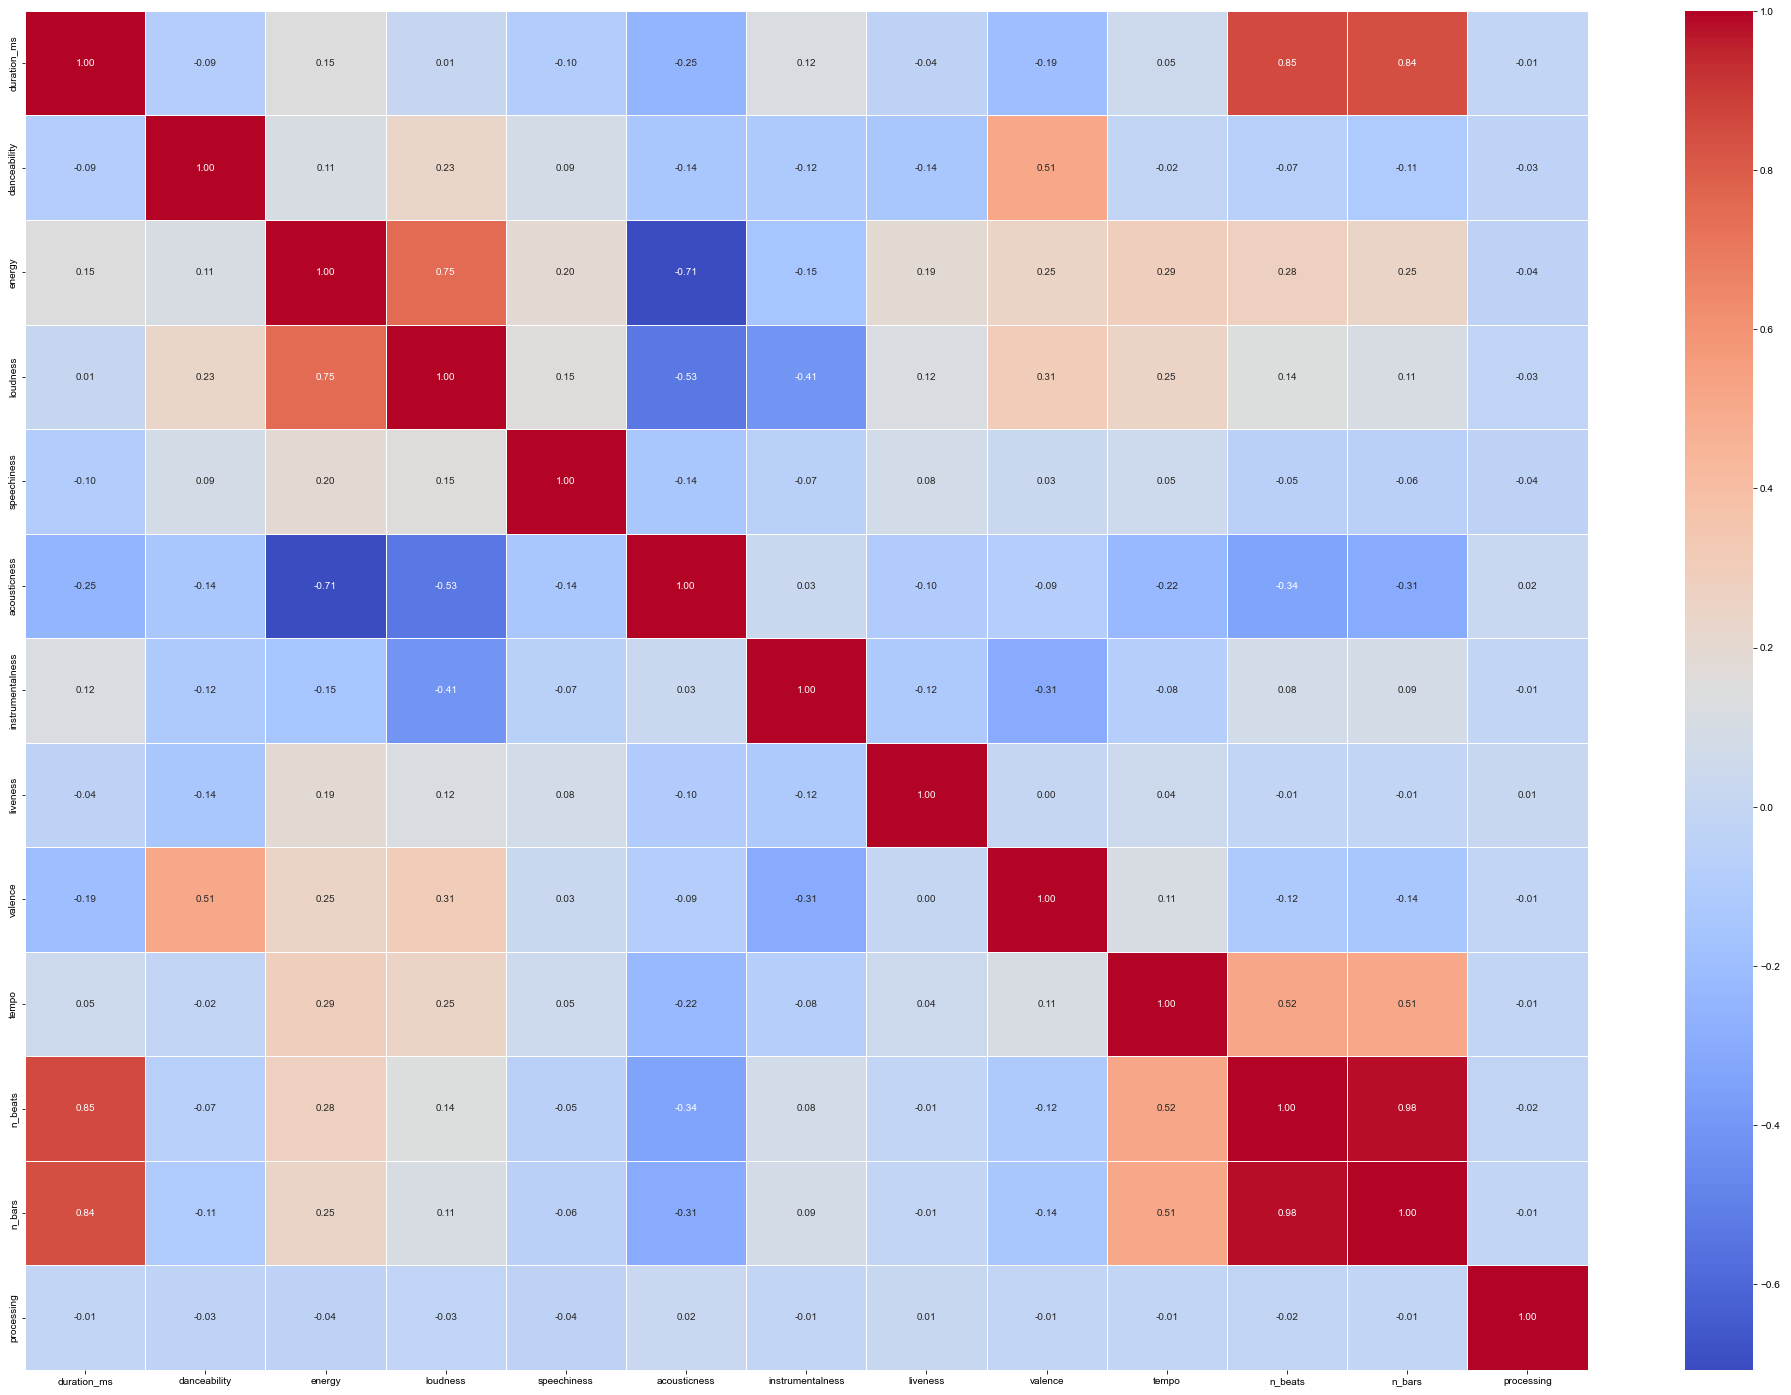

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv("file_train_senza_outliers.csv")

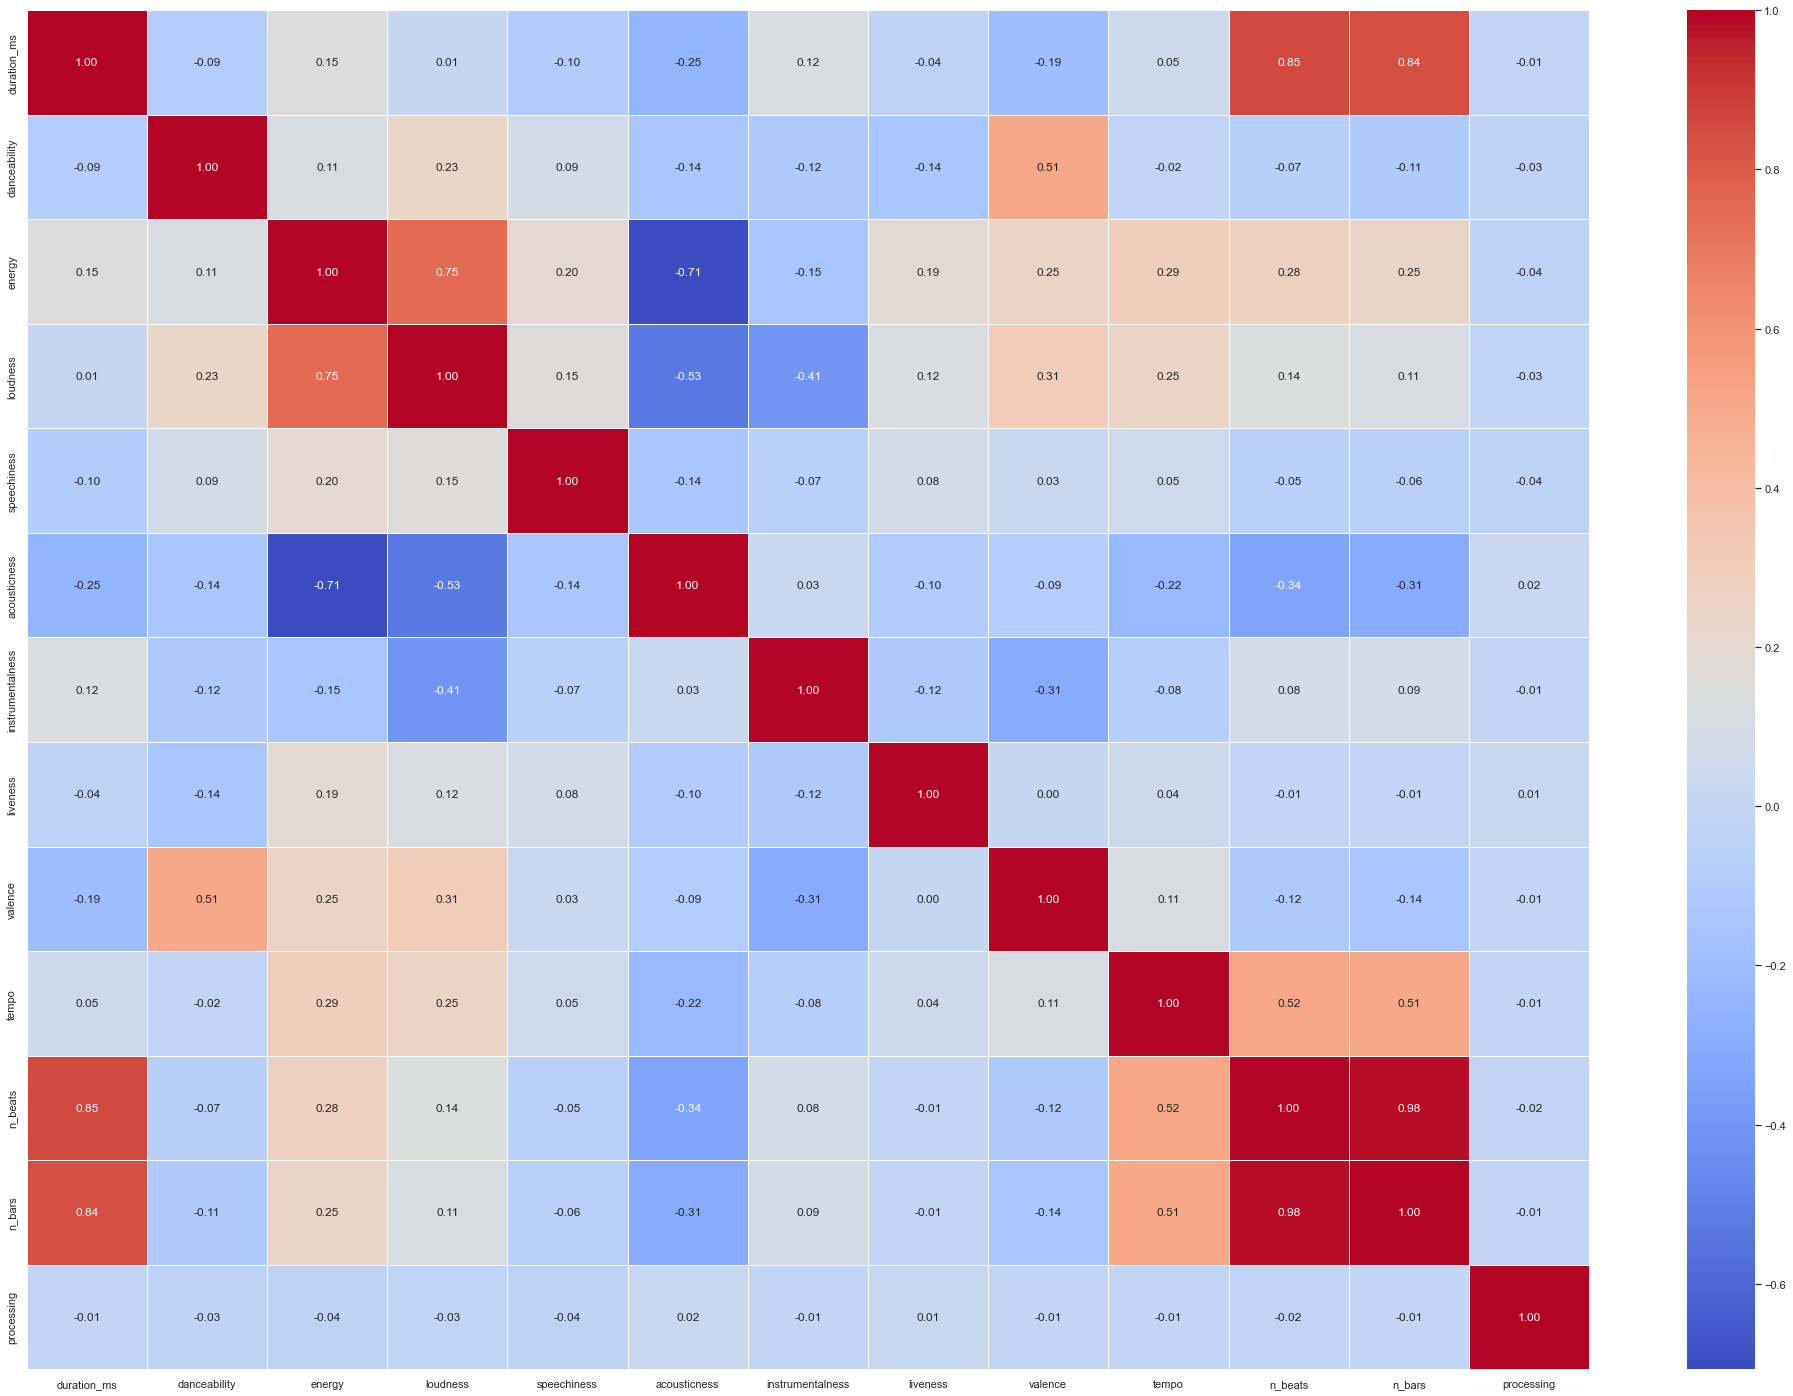

In [20]:
selected_columns = df[['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]

plt.figure(figsize = (35, 25))
sns.heatmap(selected_columns.corr(),cmap='coolwarm', annot=True, fmt=".2f", linewidth='.8') 
sns.set(font_scale=1)

In [59]:
X = df.select_dtypes(include=float).values
#y = np.array(df['target'])
#y_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
#y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map)

In [60]:
# z-score, fit and then transform
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [61]:
# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [83]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=2, n_init=10)

In [84]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1])

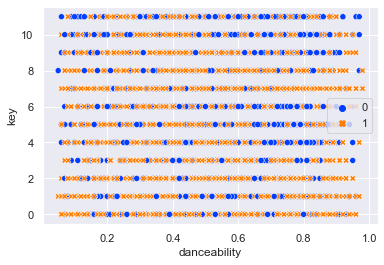

In [85]:
sns.scatterplot(data=df, 
                x="danceability",
                y="key",
                hue=kmeans.labels_,
                style=kmeans.labels_,
                palette="bright")
plt.show()

## DBScan

In [86]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

In [87]:
k=3
kth_distances = []
for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

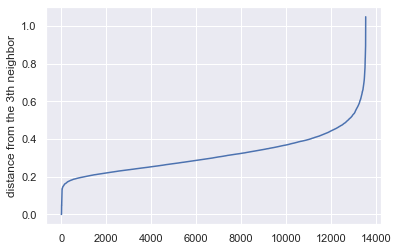

In [88]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

In [92]:
dbscan = DBSCAN(eps=0.50, min_samples=4, metric='precomputed')
dbscan.fit(dist)

DBSCAN(metric='precomputed', min_samples=4)

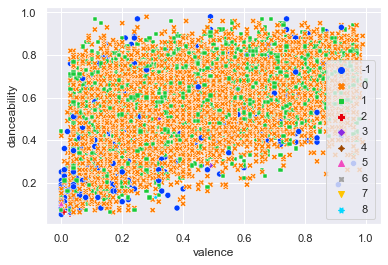

In [116]:
sns.scatterplot(data=df, 
                x="valence", 
                y="danceability", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

## C-Means (fuzzy means)

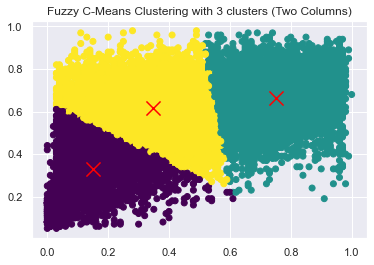

In [117]:
#!pip install  scikit-fuzzy

import skfuzzy as fuzz

# Load your data into a DataFrame or use your existing DataFrame
# For example:
# df = pd.read_csv('your_data.csv')

# Extract the data from the two columns of interest
data = df[["valence", "danceability"]].values

# Number of clusters
c = 3

# Fuzziness coefficient (typically between 1.1 and 2.0)
m = 1.1

# Maximum number of iterations
max_iters = 100

# Tolerance (stop when change in membership is smaller than this)
tolerance = 1e-3

# Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.T, c, m, error=tolerance, maxiter=max_iters, init=None
)

# Get the cluster membership degrees
cluster_membership = np.argmax(u, axis=0)

# Visualize the data and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=cluster_membership, cmap='viridis')
plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='x', s=200)
plt.title(f'Fuzzy C-Means Clustering with {c} clusters (Two Columns)')
plt.show()
